In [0]:
import pandas as pd
import numpy as np 
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt

In [0]:
# Here we import a csv data set

data = pd.read_csv('StudentsPerformance.csv') 

# How does the data look like?

In [0]:
# We check for mising values. The result 0 shows that there is not any missing values, 
# otherwise, the output will be greater than 0
data.isnull().sum().sum()

0

In [0]:
# We want to have a look at the first 5 data points.

data.head()

,gender,race,parental_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                1000 non-null object
race                  1000 non-null object
parental_education    1000 non-null object
lunch                 1000 non-null object
test_prep             1000 non-null object
math_score            1000 non-null int64
reading_score         1000 non-null int64
writing_score         1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [0]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Data Preparation

In [0]:
catX = data.drop(['math_score','reading_score','writing_score'], axis=1) 
catX.head()

,gender,race,parental_education,lunch,test_prep
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [0]:
#data.boxplot('math score','race/ethnicity',rot = 30,figsize=(5,6))
#data.boxplot('reading score','race/ethnicity',rot = 30,figsize=(5,6))
#data.boxplot('writing score','race/ethnicity',rot = 30,figsize=(5,6))
#data.boxplot('math score','parental level of education',rot = 30,figsize=(5,6))
#data.boxplot('reading score','parental level of education',rot = 30,figsize=(5,6))
#data.boxplot('writing score','parental level of education',rot = 30,figsize=(5,6))
#data.boxplot('math score','gender',rot = 30,figsize=(5,6))
#data.boxplot('reading score','gender',rot = 30,figsize=(5,6))
#data.boxplot('writing score','gender',rot = 30,figsize=(5,6))
#data.boxplot('math score','lunch',rot = 30,figsize=(5,6))
#data.boxplot('reading score','lunch',rot = 30,figsize=(5,6))
#data.boxplot('writing score','lunch',rot = 30,figsize=(5,6))
#data.boxplot('math score','test preparation course',rot = 30,figsize=(5,6))
#data.boxplot('reading score','test preparation course',rot = 30,figsize=(5,6))
#data.boxplot('writing score','test preparation course',rot = 30,figsize=(5,6))

In [0]:
replace_map = {'gender': {'female': 0, 'male':1},'race': {'group A': 0, 'group B': 1/4, 'group C': 2/4, 'group D': 3/4,
                                  'group E': 1},'parental_education': {'high school': 0, 'some high school': 1/5, 'some college': 2/5, "associate's degree": 3/5, "bachelor's degree": 4/5,
                                  "master's degree": 1},'lunch': {'free/reduced': 0, 'standard':1},
              'test_prep': {'none': 0, 'completed':1}}
catX.replace(replace_map, inplace=True)

catX.head()

,gender,race,parental_education,lunch,test_prep
0,0,0.25,0.8,1,0
1,0,0.50,0.4,1,1
2,0,0.25,1.0,1,0
3,1,0.00,0.6,0,0
4,1,0.50,0.4,1,0


In [0]:
numy = data.loc[:,['math_score','reading_score','writing_score']]/100
numy.head()

,math_score,reading_score,writing_score
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75


In [0]:
All=pd.concat([catX, numy], axis=1)
All.head()

,gender,race,parental_education,lunch,test_prep,math_score,reading_score,writing_score
0,0,0.25,0.8,1,0,0.72,0.72,0.74
1,0,0.50,0.4,1,1,0.69,0.90,0.88
2,0,0.25,1.0,1,0,0.90,0.95,0.93
3,1,0.00,0.6,0,0,0.47,0.57,0.44
4,1,0.50,0.4,1,0,0.76,0.78,0.75


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


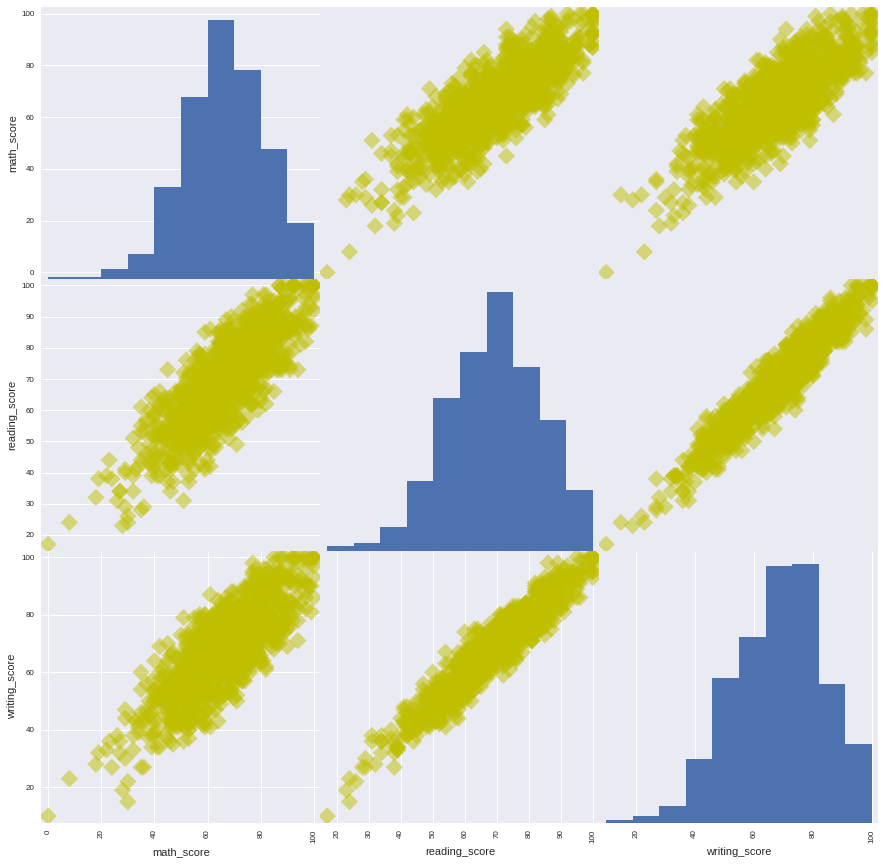

In [0]:
# Show the mutual scatter plot of the first 10 attributes. When the scatter plot involves a 
# an attibute against itself, its histogram is display instead of the scatter plot.

pd.scatter_matrix(data.iloc[:,0:9], c='y', figsize=(15,15), s=150, marker='D')
plt.show()

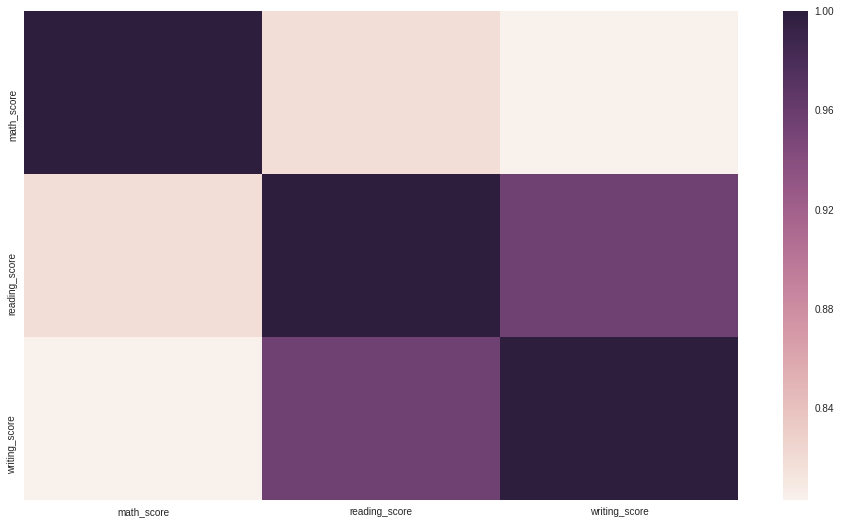

In [0]:
plt.rcParams["figure.figsize"] = [16,9]
sn.heatmap(data.corr())

# Similarity measures

In [0]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(catX.T, metric = "hamming")
Cat= pd.DataFrame(jac_sim, index=catX.columns, columns=catX.columns)
Cat

,gender,race,parental_education,lunch,test_prep
gender,1.000,0.107,0.117,0.505,0.508
race,0.107,1.000,0.026,0.135,0.118
parental_education,0.117,0.026,1.000,0.105,0.160
lunch,0.505,0.135,0.105,1.000,0.451
test_prep,0.508,0.118,0.160,0.451,1.000


In [0]:
Num_measure=sp.spatial.distance.cdist(numy,numy, metric='seuclidean')
num_measure=1/(1+Num_measure)
num_measure

array([[1.        , 0.39182908, 0.29975908, ..., 0.48910715, 0.65493626,
        0.43752997],
       [0.39182908, 1.        , 0.4057659 , ..., 0.32229314, 0.47675856,
        0.62148965],
       [0.29975908, 0.4057659 , 1.        , ..., 0.23772159, 0.31865645,
        0.46460965],
       ...,
       [0.48910715, 0.32229314, 0.23772159, ..., 1.        , 0.47656264,
        0.32340811],
       [0.65493626, 0.47675856, 0.31865645, ..., 0.47656264, 1.        ,
        0.49952275],
       [0.43752997, 0.62148965, 0.46460965, ..., 0.32340811, 0.49952275,
        1.        ]])

In [0]:
l=range(1000)
num_measure_pd=pd.DataFrame(data=num_measure, index=l, columns=l)

num_measure_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.391829,0.299759,0.265221,0.669849,0.555248,0.309001,0.212637,0.529243,0.258805,...,0.473398,0.535583,0.462555,0.602532,0.461952,0.282568,0.353123,0.489107,0.654936,0.437530
1,0.391829,1.000000,0.405766,0.202003,0.439885,0.547935,0.429972,0.168272,0.305000,0.207074,...,0.393780,0.527351,0.392441,0.383549,0.281616,0.404719,0.234289,0.322293,0.476759,0.621490
2,0.299759,0.405766,1.000000,0.166041,0.344728,0.357794,0.871504,0.142510,0.236856,0.165221,...,0.392608,0.320672,0.257931,0.268021,0.222986,0.751082,0.194377,0.237722,0.318656,0.464610
3,0.265221,0.202003,0.166041,1.000000,0.241233,0.234232,0.169300,0.472988,0.339658,0.574023,...,0.214026,0.246419,0.283146,0.291025,0.378910,0.161732,0.447677,0.349724,0.253111,0.202516
4,0.669849,0.439885,0.344728,0.241233,1.000000,0.660109,0.357311,0.195173,0.425441,0.235722,...,0.591388,0.555434,0.417780,0.496767,0.386306,0.322096,0.307557,0.419120,0.647709,0.523422


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
All_sim=cosine_similarity(All)
All_sim

array([[1.        , 0.84548856, 0.99422866, ..., 0.53528644, 0.8239459 ,
        0.764657  ],
       [0.84548856, 1.        , 0.8386153 , ..., 0.85371193, 0.98998467,
        0.73476895],
       [0.99422866, 0.8386153 , 1.        , ..., 0.56535569, 0.81054836,
        0.8045987 ],
       ...,
       [0.53528644, 0.85371193, 0.56535569, ..., 1.        , 0.85057782,
        0.75253439],
       [0.8239459 , 0.98998467, 0.81054836, ..., 0.85057782, 1.        ,
        0.736655  ],
       [0.764657  , 0.73476895, 0.8045987 , ..., 0.75253439, 0.736655  ,
        1.        ]])

In [0]:
l=range(1000)
all_measure_pd=pd.DataFrame(data=All_sim, index=l, columns=l)

all_measure_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.845489,0.994229,0.591728,0.840875,0.991783,0.856021,0.533660,0.452295,0.694549,...,0.497254,0.808093,0.776926,0.792398,0.732033,0.876371,0.506587,0.535286,0.823946,0.764657
1,0.845489,1.000000,0.838615,0.478039,0.764528,0.866169,0.989298,0.465709,0.720652,0.715434,...,0.739671,0.988634,0.719588,0.703292,0.675789,0.959474,0.523632,0.853712,0.989985,0.734769
2,0.994229,0.838615,1.000000,0.632382,0.830372,0.986495,0.855100,0.564224,0.473117,0.739389,...,0.519347,0.797653,0.815862,0.831622,0.714066,0.875545,0.532660,0.565356,0.810548,0.804599
3,0.591728,0.478039,0.632382,1.000000,0.802716,0.580415,0.506863,0.970906,0.691295,0.565525,...,0.680617,0.437304,0.620069,0.638735,0.746395,0.533890,0.851785,0.420458,0.442572,0.607096
4,0.840875,0.764528,0.830372,0.802716,1.000000,0.856753,0.761921,0.829042,0.717356,0.681889,...,0.737296,0.734897,0.697939,0.687288,0.944916,0.770411,0.839776,0.536910,0.758096,0.714577


# Classification

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error as mse

In [0]:
# Select your learner
from sklearn.neighbors import KNeighborsClassifier
 


# Mixed Data

In [0]:

All.head()

,gender,race,parental_education,lunch,test_prep,math_score,reading_score,writing_score
0,0,0.25,0.8,1,0,0.72,0.72,0.74
1,0,0.50,0.4,1,1,0.69,0.90,0.88
2,0,0.25,1.0,1,0,0.90,0.95,0.93
3,1,0.00,0.6,0,0,0.47,0.57,0.44
4,1,0.50,0.4,1,0,0.76,0.78,0.75


In [0]:
## Divides the dataset into X, variables, and y, target
X = All.drop('gender', axis=1) # drop removes the column named 'gender' out of the dataset 'data'
y = data.loc[:,'gender'] # 'loc' is for 'location/localize'. Thus, we selected all the row of the column which is 
# localized by the name 'gender' 

## Choses 90% of the data for training, (X_train,y_train), and reserves 10% for test (X_test, y_test) 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42, stratify = y)


In [0]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
KNeighborsClassifier?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [0]:

neigh = KNeighborsClassifier(n_neighbors=7, metric='cosine')


In [0]:
#neigh.fit(X, y)
neigh.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = neigh.predict(X_train)

# Classification report on the training dataset:
print('Classification report:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_train, y_train))

Classification report:
               precision    recall  f1-score   support

      female       0.52      0.74      0.61       466
        male       0.50      0.28      0.36       434

   micro avg       0.52      0.52      0.52       900
   macro avg       0.51      0.51      0.48       900
weighted avg       0.51      0.52      0.49       900

Accuracy score:
 0.5166666666666667


In [0]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = neigh.predict(X_test)

# Classification report on the training dataset:
print('Classification report:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_test, y_test))

Classification report:
               precision    recall  f1-score   support

      female       0.54      0.75      0.63        52
        male       0.54      0.31      0.39        48

   micro avg       0.54      0.54      0.54       100
   macro avg       0.54      0.53      0.51       100
weighted avg       0.54      0.54      0.52       100

Accuracy score:
 0.54


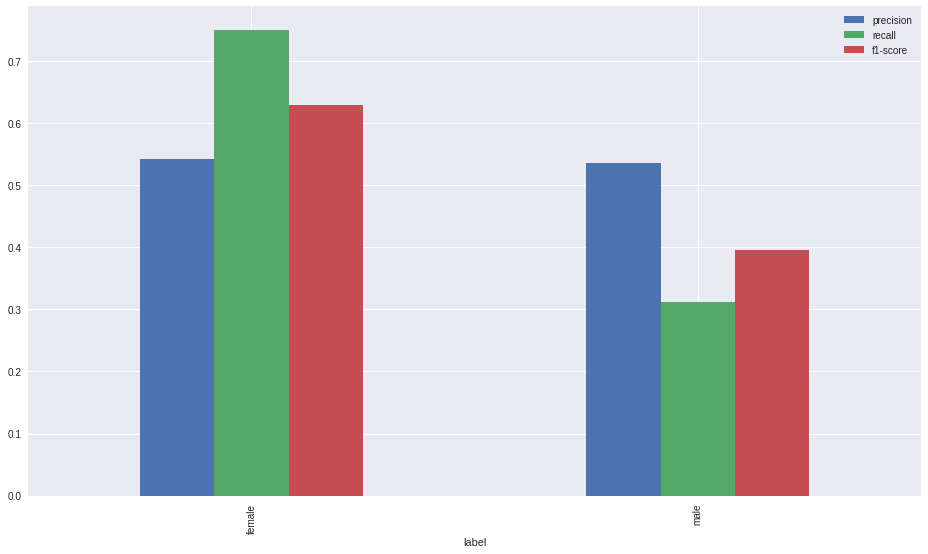

In [0]:
report_data = []
for label, metrics in classification_report(y_test, y_te_pred, output_dict=True).items():
    metrics['label'] = label
    report_data.append(metrics)

report_df1 = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
new=report_df1.iloc[:2,:4]
ax = new.plot.bar(x='label')
#report_df1.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')
plt.savefig('ax')

In [0]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(neigh, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.52736318 0.55223881 0.525      0.54773869 0.52261307]
Mean of the scores:  0.5349907497687443 
 with standard deviation 0.012419399524144722

Metric used:  precision_macro
Cross validation scores: [0.76130653 0.55074535 0.53463203 0.54690983 0.53336557]
Mean of the scores:  0.5853918639908813 
 with standard deviation 0.08821622739720089

Metric used:  recall_macro
Cross validation scores: [0.51030928 0.54926646 0.50721154 0.54682443 0.50697816]
Mean of the scores:  0.5241179722006215 
 with standard deviation 0.019587294036661637


#Numerical

In [0]:
numy.head()

,math_score,reading_score,writing_score
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75


In [0]:
## Divides the dataset into X, variables, and y, target
X = numy # drop removes the column named 'gender' out of the dataset 'data'
y = data.loc[:,'gender'] # 'loc' is for 'location/localize'. Thus, we selected all the row of the column which is 
# localized by the name 'gender' 

## Choses 90% of the data for training, (X_train,y_train), and reserves 10% for test (X_test, y_test) 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42, stratify = y)


In [0]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
KNeighborsClassifier?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [0]:

neigh = KNeighborsClassifier(n_neighbors=2, metric='seuclidean', algorithm='brute')
neigh

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [0]:
#neigh.fit(X, y)
neigh.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = neigh.predict(X_train)

# Classification report on the training dataset:
print('Classification report:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_train, y_train))

Classification report:
               precision    recall  f1-score   support

      female       0.85      1.00      0.92       466
        male       1.00      0.81      0.90       434

   micro avg       0.91      0.91      0.91       900
   macro avg       0.93      0.91      0.91       900
weighted avg       0.92      0.91      0.91       900

Accuracy score:
 0.9088888888888889


In [0]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = neigh.predict(X_test)

# Classification report on the training dataset:
print('Classification report:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_test, y_test))

Classification report:
               precision    recall  f1-score   support

      female       0.73      0.88      0.80        52
        male       0.84      0.65      0.73        48

   micro avg       0.77      0.77      0.77       100
   macro avg       0.78      0.77      0.76       100
weighted avg       0.78      0.77      0.77       100

Accuracy score:
 0.77


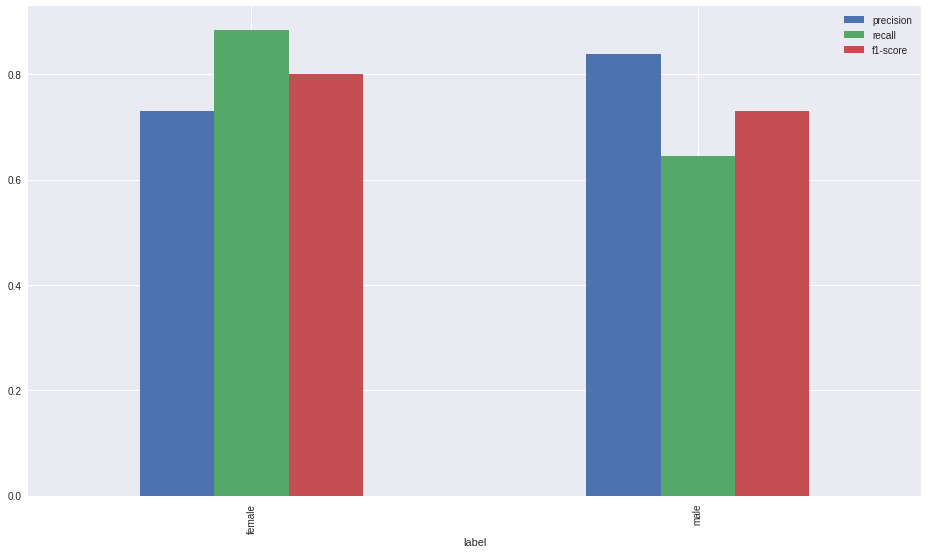

In [0]:
report_data = []
for label, metrics in classification_report(y_test, y_te_pred, output_dict=True).items():
    metrics['label'] = label
    report_data.append(metrics)

report_df2 = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
new2=report_df2.iloc[:2,:4]
bx = new2.plot.bar(x='label')
#report_df2.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')
plt.savefig('bx')

In [0]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(neigh, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.80099502 0.86567164 0.8        0.80904523 0.77386935]
Mean of the scores:  0.8099162479061978 
 with standard deviation 0.03028769355110571

Metric used:  precision_macro
Cross validation scores: [0.82020548 0.87087968 0.80833333 0.81780462 0.8043628 ]
Mean of the scores:  0.8243171824905409 
 with standard deviation 0.024004358563969746

Metric used:  recall_macro
Cross validation scores: [0.79659001 0.86360032 0.79647436 0.80597694 0.76810275]
Mean of the scores:  0.8061488753339543 
 with standard deviation 0.031410741916828


#Categorcal

In [0]:
catX.head()

,gender,race,parental_education,lunch,test_prep
0,0,0.25,0.8,1,0
1,0,0.50,0.4,1,1
2,0,0.25,1.0,1,0
3,1,0.00,0.6,0,0
4,1,0.50,0.4,1,0


In [0]:
## Divides the dataset into X, variables, and y, target
X = catX.drop('gender',axis=1) # drop removes the column named 'gender' out of the dataset 'data'
y = data.loc[:,'gender'] # 'loc' is for 'location/localize'. Thus, we selected all the row of the column which is 
# localized by the name 'gender' 

## Choses 90% of the data for training, (X_train,y_train), and reserves 10% for test (X_test, y_test) 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42, stratify = y)


In [0]:
# Let us use the Logistic regression as a base learner.
# The best way is to apprehend the parameters of the learner. This can be done through 
# the command 'learner_name ?' as follows
KNeighborsClassifier?
# After running this command, you can copy and paste the results in a new cell wherein you can  carefully 
# read the explanation of the different parameters. 

In [0]:

neigh = KNeighborsClassifier(n_neighbors=2, metric='jaccard')
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='jaccard',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [0]:
#neigh.fit(X, y)
neigh.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = neigh.predict(X_train)

# Classification report on the training dataset:
print('Classification report:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_train, y_train))

Classification report:
               precision    recall  f1-score   support

      female       0.52      0.74      0.61       466
        male       0.50      0.28      0.36       434

   micro avg       0.52      0.52      0.52       900
   macro avg       0.51      0.51      0.48       900
weighted avg       0.51      0.52      0.49       900

Accuracy score:
 0.5166666666666667


In [0]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = neigh.predict(X_test)

# Classification report on the training dataset:
print('Classification report:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_test, y_test))

Classification report:
               precision    recall  f1-score   support

      female       0.54      0.75      0.63        52
        male       0.54      0.31      0.39        48

   micro avg       0.54      0.54      0.54       100
   macro avg       0.54      0.53      0.51       100
weighted avg       0.54      0.54      0.52       100

Accuracy score:
 0.54


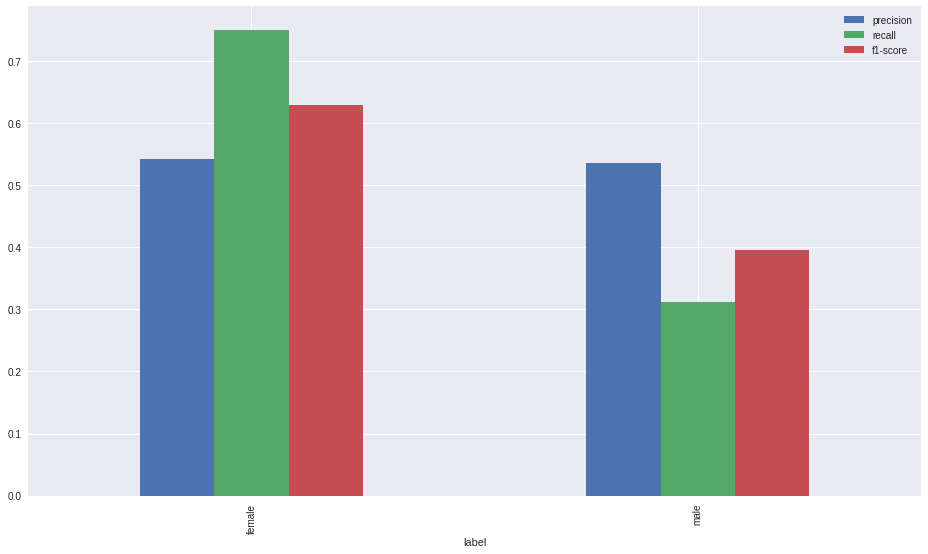

In [0]:
report_data = []
for label, metrics in classification_report(y_test, y_te_pred, output_dict=True).items():
    metrics['label'] = label
    report_data.append(metrics)

report_df3 = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
new3=report_df3.iloc[:2,:4]
cx = new3.plot.bar(x='label')
#report_df3.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')
plt.savefig('cx')

In [0]:
#new=report_df3.iloc[:2,:4]
#new

In [0]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(neigh, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.52736318 0.55223881 0.525      0.54773869 0.52261307]
Mean of the scores:  0.5349907497687443 
 with standard deviation 0.012419399524144722

Metric used:  precision_macro
Cross validation scores: [0.76130653 0.55074535 0.53463203 0.54690983 0.53336557]
Mean of the scores:  0.5853918639908813 
 with standard deviation 0.08821622739720089

Metric used:  recall_macro
Cross validation scores: [0.51030928 0.54926646 0.50721154 0.54682443 0.50697816]
Mean of the scores:  0.5241179722006215 
 with standard deviation 0.019587294036661637
